In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon Modeli

In [62]:
dia = pd.read_csv('./diabetes.csv')
df = dia.copy()
df.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
Y = df["Outcome"]

In [6]:
X = df.drop(["Outcome"], axis = 1)

### Modeling with Statsmodels

In [8]:
loj = sm.Logit(Y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 02 May 2024   Pseudo R-squ.:                 0.05922
Time:                        18:37:40   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

## Modeling with Scikit-learn

In [10]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X, Y)

In [13]:
loj_model.intercept_ #modelin sabit katsayısı

array([-5.89224562])

In [14]:
loj_model.coef_ #bütün bağımsız değişkenlerin katsayı değerlerini görüyoruz.regresyon katsayıları

array([[ 1.17057741e-01,  2.83885308e-02, -1.68876773e-02,
         7.55872388e-04, -6.42915371e-04,  5.97708045e-02,
         6.77538983e-01,  7.24146587e-03]])

# LR için Tahmin ve Model Tuning İşlemleri

In [15]:
y_pred = loj_model.predict(X)

In [17]:
conf_matrix = confusion_matrix(Y, y_pred)
conf_matrix

array([[448,  52],
       [121, 147]])

### Yukıardaki oluşan conf_matrix şu şekilde yorumlanmalı;
#### 1-1 hesaplananların sayısı 448
#### 1-0 hesaplananların sayısı 52
#### 0-1 hesaplananların sayısı 121
#### 0-0 hesaplananların sayısı 147


In [18]:
accuracy_score(Y, y_pred=y_pred)

0.7747395833333334

In [19]:
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



## Aşağıda görüldüğü üzere ilk 10 tahmin değerimizi aldık fakat genel olarak sınıflandırma problemlerinde ilerleyiş biçimimiz şu şekilde olmalı her bir yapıya özel olasılık değerlerini inceleyelim bir eşik belirleyip ona göre 1 ya da 0 demek en mantıklısı olacaktır.

In [22]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [21]:
loj_model.predict_proba(X)[0:10]

array([[0.35038771, 0.64961229],
       [0.91702719, 0.08297281],
       [0.22474964, 0.77525036],
       [0.92139583, 0.07860417],
       [0.16725317, 0.83274683],
       [0.79899318, 0.20100682],
       [0.88020119, 0.11979881],
       [0.27813832, 0.72186168],
       [0.32059416, 0.67940584],
       [0.9227425 , 0.0772575 ]])

## Yukarıdaki model çıktısının ilk sütunu bize 0 sınıfına ait olma olasılığını verir.
## diğer sütun ise 1 sınıfına ait olma olasılığını verir.

In [23]:
Y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

## gerçek değerler ile tahmin edilen değerler ve bunların yanında sınıflar özelinde oluşturulan olasılık değerleri karşılaştırınca daha anlamlı bir hale geliyor. mantıken gerçekte 1 olan bir değeri benim modelim 1 olarak tahmin ederse predict_proba fonksiyonunda 2.sütun yani 1 lerin sınıfının değeri yüksek olmasını bekleriz.

In [26]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs

array([0.64961229, 0.08297281, 0.77525036, 0.07860417, 0.83274683,
       0.20100682, 0.11979881, 0.72186168, 0.67940584, 0.0772575 ,
       0.2208179 , 0.84280595, 0.70727986, 0.63331638, 0.59883054,
       0.52966302, 0.32344249, 0.24616702, 0.393791  , 0.25474316,
       0.36613641, 0.30511892, 0.87574814, 0.33995364, 0.62892482,
       0.47131796, 0.65865122, 0.08796007, 0.55239836, 0.26943829,
       0.37675209, 0.54950064, 0.09741887, 0.06835461, 0.44284242,
       0.21690709, 0.63458828, 0.38972658, 0.19778257, 0.49461025,
       0.70392168, 0.60505097, 0.14929916, 0.83411117, 0.61932844,
       0.8915405 , 0.44797772, 0.07080818, 0.39063966, 0.15295616,
       0.06945765, 0.14516718, 0.11764772, 0.75105066, 0.6786081 ,
       0.05494963, 0.83805662, 0.29083649, 0.69290364, 0.21491497,
       0.05139503, 0.50894662, 0.04963173, 0.3714847 , 0.37479354,
       0.16477073, 0.18780862, 0.35396089, 0.06731866, 0.330113  ,
       0.22794316, 0.41845392, 0.72706231, 0.27854635, 0.08046

In [27]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [28]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [29]:
conf_matrix = confusion_matrix(Y, y_pred)
conf_matrix

array([[448,  52],
       [121, 147]])

In [30]:
accuracy_score(Y, y_pred=y_pred)

0.7747395833333334

In [31]:
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



# ROC Eğrisi Oluşturma

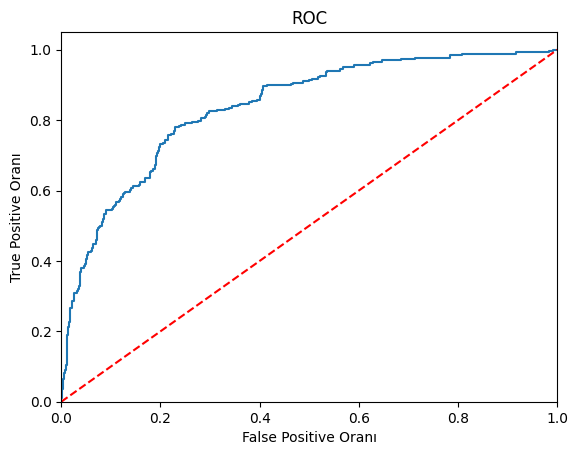

In [33]:
logit_roc_auc = roc_auc_score(Y, loj_model.predict(X))

false_positive_rate, true_positive_rate, thresholds_rate = roc_curve(Y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

## ROC (Receiver Operating Characteristic) eğrisi, bir sınıflandırma modelinin performansını değerlendirmek için kullanılan bir grafiktir. Modelin doğru pozitif oranı (TPR) ve yanlış pozitif oranı (FPR) arasındaki ilişkiyi gösterir. AUC (Area Under the Curve) ise ROC eğrisinin altında kalan alanı ifade eder ve modelin performansını ölçer. AUC değeri 0 ile 1 arasında değişir; 1'e yaklaştıkça, modelin performansı daha iyidir. ROC eğrisi ve AUC, farklı modellerin performansını karşılaştırmak ve sınıflandırma modelinin performansını daha iyi anlamak için kullanılır.

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=.25,
                                                    random_state=42)

In [39]:
loj_model = LogisticRegression(solver='liblinear')
loj_model = loj_model.fit(X_train, Y_train)

## Test Hatamızı Değerlendirelim

In [43]:
# Test Hatamızı Değerlendirelim
acc_score = accuracy_score(Y_test, loj_model.predict(X_test))
print("Test seti için Doğruluk Değerimiz:",acc_score)

Test seti için Doğruluk Değerimiz: 0.7447916666666666


## Test Seti için En Doğrulanmış Skora Yani Cross-Val-Score'a Erişmek İstersek;

In [48]:
print("Test için en güvenli doğrulama skorundan alınan değer:",cross_val_score(loj_model, X_test, Y_test, cv = 10).mean())

Test için en güvenli doğrulama skorundan alınan değer: 0.7397368421052632


## Naive Bayes

## Naive Bayes, sınıflandırma problemlerinde kullanılan bir makine öğrenme algoritmasıdır. Temelde Bayes Teoremi'ne dayanır ve özellikle metin sınıflandırma gibi problemlerde etkilidir.

## Algoritmanın temel fikri, bir örneğin belirli bir sınıfa ait olma olasılığını hesaplamaktır. Bu hesaplama, özelliklerin veri setindeki sınıflarla ilişkisini kullanarak yapılır. Naive Bayes, özellikler arasındaki bağımsızlık varsayımını yapar, yani her özelliğin sınıfı belirleme sürecinde birbirinden bağımsız olduğunu varsayar.

## Naive Bayes'de de hiperparametre tuning için yapabileceğim dışsal bir parametre yok.

In [4]:
dia = pd.read_csv('./diabetes.csv')
df = dia.copy()
df.dropna()
Y = df["Outcome"]
X = df.drop(['Outcome'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    train_size=0.30,
                                                    random_state=42)

In [23]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: ylabel='Outcome'>

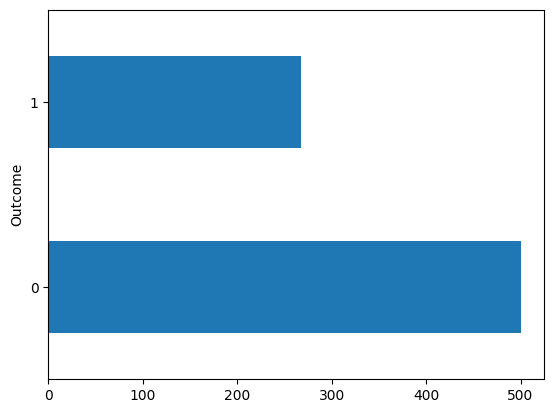

In [25]:
df["Outcome"].value_counts().plot.barh()

### İlgilendiğimiz bağımlı değişken ile bağımsız değişkenler arasında veri sayısı olarak büyük fark, dengesizlik varsa train_test ayrımı yapısı çok büyük önem taşımaktadır. Dikkkat edilmesi gerekir aksi taktirde zaten verisi az olan bir sınıfa daha da az veri verirsek modelin öğreniminde büyük bir sıkıntı olacaktır.

In [5]:
from sklearn.naive_bayes import GaussianNB

In [7]:
nb = GaussianNB()
nb_model = nb.fit(X_train, Y_train)
nb

GaussianNB()

# Tahmin

In [9]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

## Tahmin etme olasılıklarına da erişmek istersek;

In [27]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73607989, 0.26392011],
       [0.94429124, 0.05570876],
       [0.96918771, 0.03081229],
       [0.86917654, 0.13082346],
       [0.58620351, 0.41379649],
       [0.51408188, 0.48591812],
       [0.99437677, 0.00562323],
       [0.15134922, 0.84865078],
       [0.64912807, 0.35087193],
       [0.35421332, 0.64578668]])

## Yukarıdaki çıktıyı incelersek ilk sütun 0, ikinci sütun 1 sınıfına ait olma olasılığını verir.

## Şimdi modelin test hatalarını kontrol edelim

In [10]:
print("Doğruluk Oranı: ", accuracy_score(Y_test, nb_model.predict(X_test)))

Doğruluk Oranı:  0.7695167286245354


In [28]:
print("Cross-Val Oranı: ", cross_val_score(nb_model ,X_test, Y_test,  cv = 10).mean())

Cross-Val Oranı:  0.7677148846960169


# Sınıflandırma için K-En Yakın Komşu Algoritması

## k-en yakın komşu algoritmasının sınıflandırma için basamakları;
### 1- Komşu sayısını belirke (K)
### 2- Bilinmeyen nokta ile diğer noktalar arasındaki uzaklığı hesapla
### 3- Uzaklıkları tek tek sırala ve belirlenen k sayısına göre en yakın olan k gözlemi seç!
### 4- Sınıflandırma için en yakın k adet gözlemin hangisinin frekansı daha fazlasysa elimize gelen ve sınıfını tahmin etmemiz gereken bağımsız değişkenin sınıfı frekansı en çok olan k adet gözlemin sınıfıdır.
## KNN modelinin regresyon tarafındaki tek farkı en yakın k adet gözlemin sınıf frekanslarının hangisiyse sınıfıda o dur tarzında değil en yakın k adet gözlemin ortalama değeri bize yeni değerin tahmin edilen değerini verirdi.

# KNN için Model Kurulumu ve Tahmin İşlemleri

In [3]:
dia = pd.read_csv('./diabetes.csv')
df = dia.copy()
df.dropna()
Y = df["Outcome"]
X = df.drop(['Outcome'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    train_size=0.30,
                                                    random_state=42)

In [4]:
#knn modelinin import edilmesi
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, Y_train)
knn_model

KNeighborsClassifier()

#### (n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#### Yukarıda KNeighborsClassifier'ın ön tanımlı değerlerini görüyoruz.

In [10]:
y_pred = knn_model.predict(X_test)

In [12]:
acc_score_for_KNNC = accuracy_score(Y_test, y_pred=y_pred)
acc_score_for_KNNC

0.6988847583643123

In [14]:
print("KNN için Cross-Val-Score:", cross_val_score(knn_model, X_test, Y_test, cv = 10).mean())

KNN için Cross-Val-Score: 0.7082809224318658


### Yukarıda 10 katlı cross-validation ile valide edilmiş doğruluk oranımızı görüyoruz ve bu %70

## Şimdi ise modelimizin sınıflandırırken hesapladığı olasılık değerlerini inceleyelim

In [20]:
knn_model.predict(X_test)[0:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [19]:
prob_analysis = knn_model.predict_proba(X_test)
prob_analysis[0:10]

array([[0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4]])

## Şimdi Sınıflandırma Raporunu İnceleyelim

In [21]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       349
           1       0.58      0.50      0.54       189

    accuracy                           0.70       538
   macro avg       0.67      0.65      0.66       538
weighted avg       0.69      0.70      0.69       538



## Classifier KNN için Model Tuning

### Alışık olduğumz şekilde GridSearhCV ve k katlı cross-validation yöntemiyle tuning işlemlerimizi sınıflandırma modelleri için de yapacağız.

In [37]:
knn_params = {'n_neighbors':np.arange(1,50,1)}
#### (n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
# parametreleri istediğimiz gibi deneyeceklerimizi sözlük formatında ve deneteceğimiz değerleri vermemiz gerekir.


In [49]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

## GridSearch sonucumuzdaki en iyi skora ve en iyi parametrelere odaklanalım

In [50]:
print("En İyi Skor:", knn_cv.best_score_)
print("En İyi Parametre:", knn_cv.best_params_)

En İyi Skor: 0.7217391304347825
En İyi Parametre: {'n_neighbors': 2}


## Şimdi gridserach sonucu oluşan en iyi parametremizi modelimizi tekrardan kurup test edelim

In [51]:
knn_tuned = KNeighborsClassifier(n_neighbors=2)
knn_tuned_model = knn_tuned.fit(X_train, Y_train)

## Denetmelerimiz sonucu oluşan En iyi parametreler ile modelimizi kurduk şimdi ise test için tahmin yaptıralım ve test tahmin sonuçlarını inceleyelim

In [52]:
knn_tuned_y_pred = knn_tuned_model.predict(X_test)
knn_tuned_y_pred[0:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [59]:
prob_analysis_for_tuned_knn = knn_tuned_model.predict_proba
prob_analysis[0:10]

array([[0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4]])

In [53]:
acc_score_for_tuned_knn = accuracy_score(Y_test, knn_tuned_y_pred)
print("Tune edilmiş KNN modelinin Doğruluk Oranı: ",acc_score_for_tuned_knn)

Tune edilmiş KNN modelinin Doğruluk Oranı:  0.7156133828996283


## Normalde accuracy_score fonksiyonu ile doğruluk oranımıza erişebiliriz fakat daha kolay olması anlamında score fonksiyonu var ve şu şekilde çalışır model.score(X_train, Y_train) dediğimizde bizim için gider fit eder eğitir doğruluk oranını analiz eder ve sonuçlarını çıkarır.
## accuracy_score fonksiyonunu kullanabilmek adına önce bir tahmin etmemiz lazım sonra accuracy_score fonksiyonunu kullanabiliriz çünkü accuracy_score fonksiyonu ikinci argüman olarak tahmin edilen y değerlerini ister.

In [60]:
score_function_test = knn_tuned_model.score(X_test, Y_test)
print("Doğruluk Oranımız: ", score_function_test)

Doğruluk Oranımız:  0.7156133828996283


In [61]:
acc_score_for_tuned_knn = accuracy_score(Y_test, knn_tuned_y_pred)
print("Tune edilmiş KNN modelinin Doğruluk Oranı: ",acc_score_for_tuned_knn)

Tune edilmiş KNN modelinin Doğruluk Oranı:  0.7156133828996283


## Yukarıdaki 2 kod bloğu da incelendiğinde iki fonksiyonu da kullanabiliriz.

## Şimdi valide edilmiş Tuned KNN modelinin doğruluk oranını inceleyelim(Cross-validation)

In [54]:
cv_score_for_tuned_knn = cross_val_score(knn_tuned_model, X_test, Y_test, cv = 10)
print("Tuned KNN için Valide Edilmiş Doğruluk Oranı: " , cv_score_for_tuned_knn.mean())

Tuned KNN için Valide Edilmiş Doğruluk Oranı:  0.6933962264150944


# Sınıflandırma için Support Vector Machine Model[SVM] (Destek Vektör Makineleri)
### Bu modelin genel amacı iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır.
### SVM aynı zamanda regresyon problemlerine de uyarlanmıştır fakat en ünlü olduğu alan sınıflandırmadır.
### Genel itibari ile nonlinear modelleri anlatırken ki kullandığımız SVM ile aynı işlemi yapıyordur.
### marjin= en yakın veri noktaları arasındaki uzaklıktır.(Alanıdır)
### Optimum hiper-düzlem nasıl bulunur?= iki doğru arasında veri noktası olmayacak şekilde aralarındaki mesafenin maksimum tutulmaya çalışılması şekliyle sağlanır. Kesikli çizgilere destek vektör noktaları denir. Destek vektör noktaları belirlenecek marjin hakkında söz sahibidir.

## SVC'nin ana parametreleri şunlardır:

#### C (C parametresi): C parametresi, düzenleme parametresidir ve modelin aşırı uyuma (overfitting) veya genelleme yapmasını dengelemek için kullanılır. Daha yüksek bir C değeri, modelin eğitim veri setine daha fazla uymasını sağlar, ancak aşırı uyuma neden olabilir. Daha düşük bir C değeri ise, düzenleme artar ve genelleme yeteneği artar. Varsayılan değer 1'dir.
#### kernel (Çekirdek fonksiyonu): SVC'nin kullanacağı çekirdek fonksiyonunu belirler. SVC, farklı çekirdek fonksiyonları kullanarak doğrusal olmayan karar sınırları oluşturabilir. Yaygın olarak kullanılan çekirdek fonksiyonları şunlardır:
#### "linear": Doğrusal çekirdek
#### "rbf" (radial basis function): RBF çekirdeği
#### "poly": Polinomiyal çekirdek
#### "sigmoid": Sigmoid çekirdek 
#### Varsayılan olarak "rbf" kullanılır.
#### gamma: RBF, polinomiyal ve sigmoid çekirdeklerinde kullanılan bir parametredir. Bu parametre, çekirdek fonksiyonunun genişliğini kontrol eder. Daha yüksek bir gamma değeri, daha dar karar sınırlarına ve daha fazla aşırı uyuma neden olur. Varsayılan değer "auto" veya "scale" olarak belirlenebilir.
#### degree: Polinomiyal çekirdek için kullanılan bir parametredir. Polinomiyal derecesini belirtir. Varsayılan değeri 3'tür.
#### coef0: Polinomiyal ve sigmoid çekirdeklerinde kullanılan bir parametredir. Karar sınırlarının doğrusallığını etkiler. Varsayılan değeri 0'dır.
#### class_weight: Sınıf dengesizliği durumunda kullanılır. Eğer sınıflar dengesizse, bu parametre dengesizliği dengelemek için kullanılır.

## Çekirdek fonksiyonları ve ne işe yaradıkları:

#### Doğrusal Çekirdek (Linear Kernel): Doğrusal çekirdek, en basit çekirdek fonksiyonudur. İki sınıf arasında doğrusal bir karar sınırı oluşturur. Bu, özellikle veri setinin doğrusal olarak ayrılabilir olduğu durumlarda etkilidir.
#### RBF (Radial Basis Function) Çekirdeği: RBF çekirdeği, doğrusal olarak ayrılabilir olmayan veri setlerinde kullanılan en yaygın çekirdek fonksiyonlarından biridir. RBF çekirdeği, her bir veri noktasını bir merkez olarak alır ve bu merkezlerin etrafında bir yoğunluk dağılımı oluşturur. Bu sayede, veri setinin herhangi bir şekilde dağılmış olmasına rağmen, karar sınırlarını esnek bir şekilde oluşturabilir.
#### Polinomiyal Çekirdek (Polynomial Kernel): Polinomiyal çekirdek, veri setindeki karmaşık ilişkileri modellemek için kullanılır. Bu çekirdek, veri setindeki özellikleri yüksek dereceli polinomlarla genişleterek karar sınırlarını oluşturur. Polinomiyal çekirdek, özellikle doğrusal olmayan ilişkilere sahip veri setlerinde etkilidir.
#### Sigmoid Çekirdeği: Sigmoid çekirdeği, sigmoid fonksiyonu kullanarak karar sınırlarını belirler. Bu çekirdek, polinomiyal çekirdekler kadar yaygın olmasa da, bazı özel durumlarda kullanılabilir.

In [65]:
dia = pd.read_csv('./diabetes.csv')
df = dia.copy()
df.dropna()
Y = df["Outcome"]
X = df.drop(['Outcome'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    train_size=0.25,
                                                    random_state=42)

In [6]:
from sklearn.svm import SVC

In [67]:
svc = SVC(kernel = 'linear')
svc_model = svc.fit(X_train, Y_train)

In [69]:
y_pred = svc_model.predict(X_test)

### Test Hatamızı Kontrol Etmek Üzere Doğruluk Oranımızı ve Valide Edilmiş Doğruluk Oranımızı İnceleyelim

In [70]:
print("Sınıflandırma Doğruluğu",accuracy_score(Y_test, y_pred= y_pred))

Sınıflandırma Doğruluğu 0.7864583333333334


In [71]:
print("Test seti için Valide edilmiş Doğruluk Oranı:", cross_val_score(svc_model ,X_test, Y_test, cv = 10).mean())

Test seti için Valide edilmiş Doğruluk Oranı: 0.7708408953418028


# SVC Model Tuning

In [88]:
svc_params = {'C':np.arange(1,10),
              'kernel':['linear','poly','rbf']}

In [89]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, cv = 5, n_jobs=-1, verbose = 1)
svc_cv_model.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

## Tune için denememiz bitti şimdi ise deneme sonuçlarında en iyi skoru ve en iyi parametreyi inceleyelim

In [95]:
print("SVM için En iyi Doğruluk Oranı", svc_cv_model.best_score_)
print("Tune edilecek SVM için en iyi parametreler: ", svc_cv_model.best_params_)

SVM için En iyi Doğruluk Oranı 0.7715249662618084
Tune edilecek SVM için en iyi parametreler:  {'C': 7, 'kernel': 'rbf'}


In [99]:
svc_tuned = SVC(kernel='rbf',C=7)
svc_tuned_model = svc_tuned.fit(X_train, Y_train)
svc_tuned_model

SVC(C=7)

In [100]:
svc_tuned_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [101]:
print("SVM için Tune edilmiş modelin doğruluk oranı:", accuracy_score(Y_test, svc_tuned_model.predict(X_test)))
print("SVM için Tune edilmiş modelin valide edilmiş doğruluk oranı: ", cross_val_score(svc_tuned_model,X_test, Y_test, cv = 10, n_jobs=-1).mean())

SVM için Tune edilmiş modelin doğruluk oranı: 0.7621527777777778
SVM için Tune edilmiş modelin valide edilmiş doğruluk oranı:  0.7587416817906837


# SVC(Support Vector Classifier)
RBF (Radial Basis Function) çekirdek fonksiyonu, SVC (Support Vector Classifier) gibi destek vektör sınıflandırıcılarında yaygın olarak kullanılan bir çekirdek fonksiyonudur. RBF çekirdeği, doğrusal olarak ayrılabilir olmayan veri setlerinde etkili bir şekilde sınıflandırma yapmak için kullanılır.

RBF çekirdeği, her bir veri noktasını bir merkez olarak alır ve bu merkezlerin etrafında bir yoğunluk dağılımı oluşturur. Bu dağılım, her bir veri noktasının etrafında bir küresel etki yaratır. RBF çekirdeği, bu küresel etkileri birbirine karıştırarak ve birleştirerek karar sınırlarını oluşturur.

γ, çekirdeğin genişliğini kontrol eden bir parametredir. Daha yüksek bir 
γ değeri, karar sınırlarının daha dar olmasına neden olur, bu da modelin eğitim veri setine daha fazla uymasına yol açabilir.
RBF çekirdeği, doğrusal olarak ayrılabilir olmayan veri setlerinde etkili bir şekilde çalışabilir. Ancak, 

γ parametresinin doğru şekilde ayarlanması önemlidir. Çünkü 

γ değeri, modelin aşırı uyuma (overfitting) veya genelleme yapmasını dengelemek için kritiktir. Bu nedenle, RBF çekirdeği kullanırken 

γ parametresinin dikkatlice ayarlanması gerekmektedir.

RBF çekirdeği, SVM ve diğer destek vektör makine modellerinde sıkça kullanılan bir çekirdek fonksiyonudur ve özellikle doğrusal olarak ayrılabilir olmayan veri setlerinde etkili bir şekilde çalışabilir.


In [3]:
dia = pd.read_csv('./diabetes.csv')
df = dia.copy()
df.dropna()
Y = df["Outcome"]
X = df.drop(['Outcome'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    train_size=0.30,
                                                    random_state=42)

In [7]:
from sklearn.svm import SVC

In [9]:
svc_model_for_rbf = SVC(kernel="rbf").fit(X_train, Y_train)

In [11]:
dir(svc_model_for_rbf)

['C',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags

# Test Hatamızı Analiz Edelim

In [15]:
y_pred = svc_model_for_rbf.predict(X_test)

In [16]:
print("Doğruluk Oranı",accuracy_score(Y_test, y_pred=y_pred))

Doğruluk Oranı 0.7490706319702602


In [17]:
svc_rbf_model_params = {'C':[0.0001,0.001,0.1,1,5,10,50,100],
                        'gamma':[0.0001,0.001,0.1,1,5,10,50,100]}

In [21]:
svc_model = SVC(kernel='rbf')
svc_cv_model = GridSearchCV(svc_model, svc_rbf_model_params, cv = 10, n_jobs=-1, verbose=2)
svc_cv_model.fit(X_train,Y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END ..............................C=0.0001, gamma=0.001; total time=   0.0s
[CV] END ..............................C=0.0001, gamma=0.001; total time=   0.0s
[CV] END .............................C=0.0001

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

# Cross Validation ile parametre testimizi sonlandırdık şimdi ise en iyi parametreler ile en iyi çıkan sonucu inceleyelim

In [23]:
print("SVC için en iyi parametreler:",svc_cv_model.best_params_)

SVC için en iyi parametreler: {'C': 5, 'gamma': 0.0001}


In [24]:
print("SVC için en iyi Doğruluk:",svc_cv_model.best_score_)

SVC için en iyi Doğruluk: 0.7434782608695653


# Tune Edilmiş SVC modelini tekrardan kuralım

In [25]:
tuned_svc = SVC(kernel='rbf',C=5 ,gamma=0.0001)
tuned_svc.fit(X_train, Y_train)

SVC(C=5, gamma=0.0001)

# Test için Tune edilmiş SVC modeliyle tahmin yapıp doğruluk oranını ve valide edilmiş doğruluk oranını inceleyelim

In [27]:
y_pred = tuned_svc.predict(X_test)

In [28]:
print("Tune Edilmiş SVC için Yeni Doğruluk Oranı",accuracy_score(Y_test, y_pred=y_pred))

Tune Edilmiş SVC için Yeni Doğruluk Oranı 0.7490706319702602


In [29]:
print("Tune Edilmiş SVC için Valide Edilmiş Doğruluk Oranı",cross_val_score(tuned_svc, X_test, Y_test, cv = 10).mean())

Tune Edilmiş SVC için Valide Edilmiş Doğruluk Oranı 0.7511879804332634


# Yapay Sinir Ağları (YSA)
## Bu kısımda YSA ile sınıflandırma yapacağız. 

# MODEL VE TAHMİN

In [39]:
dia = pd.read_csv('./diabetes.csv')
df = dia.copy()
df.dropna()
Y = df["Outcome"]
X = df.drop(['Outcome'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    train_size=0.30,
                                                    random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [43]:
scaler.fit(X_train)
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [44]:
scaled_x_train[0:5]

array([[-0.56620422,  2.45371981,  0.01486842,  1.55100431,  4.1765343 ,
        -0.1914933 , -0.97040363,  1.72971389],
       [ 0.03254047, -0.98806101,  1.11406922,  1.67988111, -0.19777135,
         0.84212114, -0.33589126, -0.32893653],
       [ 2.12814688,  0.55591543,  0.38126868, -1.34872376, -0.68082351,
         0.19611211, -0.15549069,  0.18572607],
       [-1.1649489 , -0.95589483, -0.10726501,  0.71330509,  1.19771266,
         1.15794777, -0.27679452, -0.67204494],
       [-1.1649489 , -1.11672571, -0.10726501,  0.71330509, -0.68082351,
         0.56936177, -0.72157525, -0.67204494]])

In [45]:
from sklearn.neural_network import MLPClassifier

In [49]:
mlpc_model = MLPClassifier()
mlpc_model.fit(scaled_x_train, Y_train)

MLPClassifier()

In [52]:
mlpc_model.coefs_

[array([[ 8.10450345e-03, -1.73493292e-01, -1.96476846e-01,
          1.77782019e-01, -4.70396034e-02,  1.30899267e-01,
          1.09446015e-01, -1.93937304e-01,  1.61496114e-01,
         -3.96581187e-01,  1.15162933e-01,  8.50628208e-02,
         -1.47433482e-01, -3.98053999e-02,  9.26091031e-02,
          1.81074887e-01, -3.18464567e-01, -8.57168000e-02,
          3.90591394e-02,  5.84277638e-02, -2.28629394e-04,
         -4.15842762e-02, -5.28592974e-02,  2.55450194e-01,
         -3.19998712e-02,  1.60484841e-01,  1.04883699e-01,
         -3.52332004e-02, -2.61901040e-01,  1.19002379e-01,
         -3.04222548e-01, -1.64275511e-01, -3.26813098e-01,
         -1.47606719e-01, -3.01688894e-01,  5.81950244e-02,
         -9.05110375e-02, -2.66040308e-01, -2.36427147e-01,
         -5.19550583e-02, -5.54318190e-02, -1.18003550e-01,
         -1.37326095e-01, -1.84659870e-01,  3.61542342e-01,
         -1.19932930e-01, -3.94333719e-01,  2.03947382e-01,
         -1.07644264e-01, -2.18176482e-0

In [53]:
dir(mlpc_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no

## Test için YSA'nın Doğruluk oranı ve Valide Edilmiş Doğruluk Oranı

In [56]:
y_pred = mlpc_model.predict(scaled_x_test)
print("Test için YSA Sınıflandırma Doğruluğu",accuracy_score(Y_test, y_pred))

Test için YSA Sınıflandırma Doğruluğu 0.7620817843866171


In [57]:
print("Test için YSA Valide Edilmiş Doğruluk Oranı: ",cross_val_score(mlpc_model, scaled_x_test, Y_test).mean())

Test için YSA Valide Edilmiş Doğruluk Oranı:  0.7695396330910349


# Model Tuning 

In [58]:
?mlpc_model

Type:        MLPClassifier
String form: MLPClassifier()
File:        ~/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', '

In [59]:
mlpc_params = {'alpha':[0.01,0.1,0.02,0.005,0.0001,0.00001],
               'hidden_layer_sizes':[(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5),
                                     (5,3)],
                'solver':["lbfgs","adam","sgd"],
                'activation':["relu","logistic"]}

In [60]:
mlp_classifier = MLPClassifier()
mlp_cv_model = GridSearchCV(mlp_classifier, mlpc_params, cv = 10,
                                                    verbose = 2,
                                                    n_jobs=-1)
mlp_cv_model.fit(scaled_x_train, Y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), so

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: Conv

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END a

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, al

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: Conv

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time= 

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: Conv

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, 

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidd

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=re

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 1

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.5s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: Conv

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=re

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END act

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10)

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_s

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sg

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END 

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activ

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_lay

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END 

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_lay

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activati

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=lo

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total tim

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_la

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 1

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, 

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.0s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: Conv

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hid

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=ad

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; t

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total 

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alph

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, 

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_lay

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solv

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; tota

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=lo

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, al

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidde

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, 

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END 

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=l

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s


/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ibrahim/anaconda3/envs/statsenv/lib/python

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_s

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: Conv

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; t

/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ibrahim/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: Conv

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sg

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.01, 0.1, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

## Parametre denememiz sonlandı şimdi en iyi parametre ile en iyi skoru inceleyelim

In [62]:
print("YSA için En iyi Parametreler", mlp_cv_model.best_params_)

YSA için En iyi Parametreler {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [63]:
print("YSA için En iyi Skor", mlp_cv_model.best_score_)

YSA için En iyi Skor 0.7565217391304346


In [67]:
mlp_classifier_tuned = MLPClassifier(activation="relu",
                               hidden_layer_sizes=(100,100),
                               alpha=0.005,
                               solver = "sgd")
mlp_classifier_tuned.fit(scaled_x_train, Y_train)

MLPClassifier(alpha=0.005, hidden_layer_sizes=(100, 100), solver='sgd')

In [68]:
y_pred = mlp_classifier_tuned.predict(scaled_x_test)

# Test hatasını değerlendirmek için Tuned YSA modelinin Doğruluk oranını ve valide edilmiş doğruluk oranını inceleyelim

In [69]:
print("Test üzerinde Tune YSA için Doğruluk Oranı:", accuracy_score(Y_test, y_pred ))

Test üzerinde Tune YSA için Doğruluk Oranı: 0.7602230483271375


In [71]:
print("Test üzerinde Tune YSA için Valide Edilmiş Doğruluk Oranı:", cross_val_score(mlp_classifier_tuned, scaled_x_test, Y_test, cv = 10).mean())

Test üzerinde Tune YSA için Valide Edilmiş Doğruluk Oranı: 0.7788958770090846


# Classification and Regression TREES

# Model ve Tahmin

In [20]:
dia = pd.read_csv('./diabetes.csv')
df = dia.copy()
df.dropna()
Y = df["Outcome"]
#X = df.drop(['Outcome'], axis = 1)
X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    train_size=0.30,
                                                    random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
cart = DecisionTreeClassifier(max_depth=2)
cart_model = cart.fit(X, Y)

# max_depth argümanı karar setinin ne kadar karmaşık olduğunu ayarlar.

In [23]:
cart_model

DecisionTreeClassifier(max_depth=2)

## KARAR SETİNİ skompile ile çıkarttık

In [24]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)



## Karar mekanizmasını manuel test edelim 

In [25]:
x = [3]

In [26]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

0

## Yukarıdaki yapıda sadece hamilelik ile bir karar seti oluşturup sınıflandırma yapısında test ettik şimdi ise tüm veri setinde karar setini deneyelim

In [72]:
dia = pd.read_csv('./diabetes.csv')
df = dia.copy()
df.dropna()
Y = df["Outcome"]
X = df.drop(['Outcome'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    train_size=0.30,
                                                    random_state=42)

In [73]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, Y_train)

In [74]:
cart_model

DecisionTreeClassifier()

In [75]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((0 if x[0] <= 2.5 else (0 if x[6] <= 0.4910000115633011 else (0 if x[2] <=
    56.0 else 1) if x[3] <= 18.0 else 0) if x[5] <= 35.75 else 1 if x[4] <=
    182.0 else 0) if x[5] <= 41.400001525878906 else 1 if x[6] <= 
    0.7985000014305115 else 0) if x[7] <= 28.5 else (1 if x[1] <= 22.0 else
    ((0 if x[6] <= 0.15299999713897705 else 1) if x[6] <= 
    0.1639999970793724 else 0) if x[0] <= 11.0 else 1 if x[3] <= 35.5 else 
    0) if x[1] <= 99.5 else (0 if x[5] <= 26.25 else (1 if x[3] <= 9.5 else
    0) if x[6] <= 0.2214999943971634 else ((0 if x[7] <= 47.0 else 1) if x[
    0] <= 0.5 else 1) if x[6] <= 1.3589999675750732 else 0) if x[1] <= 
    119.5 else (1 if x[6] <= 0.14099999889731407 else (0 if x[2] <= 70.0 else
    1) if x[7] <= 29.5 else 0) if x[3] <= 47.5 else 1) if x[1] <= 127.5 else
    (((1 if x[2] <= 57.5 else ((0 if x[7] <= 45.0 else 1 if x[7] <= 53.5 else
    0) if x[6] <= 0.31850001215934753 else 1) if x[6] <= 0.375 else 0) if x
    [6] <= 1.0370000302791595 else 

In [76]:
x = [3]

In [77]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

0

## Oluşturulan Modelin Test Hatalarını İnceleyelim

In [78]:
y_pred = cart_model.predict(X_test)

In [79]:
print("Test için Doğruluk Oranı Analizi", accuracy_score(Y_test, y_pred=y_pred))

Test için Doğruluk Oranı Analizi 0.6895910780669146


In [80]:
print("Test için Valide Edilmiş Doğruluk Oranı Analizi", cross_val_score(cart_model, X_test, Y_test, cv = 10).mean())

Test için Valide Edilmiş Doğruluk Oranı Analizi 0.6970300489168414


# CART Model Tuning

In [81]:
cart_model

DecisionTreeClassifier()

In [82]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        ~/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or flo

In [83]:
#min samples bize dallanma oranını anlatıyor. iyi ayarlanması gerekir çünkü rassallık bozulabilir
cart_params = {'max_depth':list(range(1,10)),
               'min_samples_split': range(2,50)}

In [84]:
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_params, cv = 10, n_jobs= -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min

# GridSearchCV sonrası en iyi parametre ve en iyi skorları analiz edip Tune edilmiş modeli tekrardan kuralım

In [85]:
print("Fine Tune edilecek cart için En iyi parametreler", cart_cv_model.best_params_)

Fine Tune edilecek cart için En iyi parametreler {'max_depth': 6, 'min_samples_split': 18}


In [86]:
print("fine tune edilecek cart için En iyi Skor", cart_cv_model.best_score_)

fine tune edilecek cart için En iyi Skor 0.7608695652173914


In [87]:
tuned_cart_model = DecisionTreeClassifier(max_depth=6,
                                          min_samples_split=18)
tuned_cart_model.fit(X_train, Y_train)
y_pred_for_tuned_cart_model = tuned_cart_model.predict(X_test)

In [88]:
print("Tune edilmiş cart model için Doğruluk oranı: ",accuracy_score(Y_test, y_pred_for_tuned_cart_model))

Tune edilmiş cart model için Doğruluk oranı:  0.7137546468401487


In [89]:
print("Tune edilmiş cart model için Valide edilmiş Doğruluk oranı: ",cross_val_score(tuned_cart_model, X_test, Y_test, cv = 10).mean())

Tune edilmiş cart model için Valide edilmiş Doğruluk oranı:  0.7155835080363382
